<a href="https://colab.research.google.com/github/THANHTRONG10052002/BAITAP1/blob/main/FLOWERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/FLOWERS/',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 2052 images belonging to 5 classes.


In [5]:
training_set.class_indices

{'common_daisy': 0, 'iris': 1, 'rose': 2, 'tulip': 3, 'water_lily': 4}

In [6]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [7]:
train=model.fit(training_set,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
65/65 [==============================] - 1014s 15s/step - loss: 1.4511 - accuracy: 0.4844
Epoch 2/10
65/65 [==============================] - 156s 2s/step - loss: 0.8897 - accuracy: 0.6550
Epoch 3/10
65/65 [==============================] - 165s 3s/step - loss: 0.7359 - accuracy: 0.7178
Epoch 4/10
65/65 [==============================] - 157s 2s/step - loss: 0.6433 - accuracy: 0.7583
Epoch 5/10
65/65 [==============================] - 158s 2s/step - loss: 0.5259 - accuracy: 0.8114
Epoch 6/10
65/65 [==============================] - 158s 2s/step - loss: 0.4609 - accuracy: 0.8367
Epoch 7/10
65/65 [==============================] - 159s 2s/step - loss: 0.4448 - accuracy: 0.8377
Epoch 8/10
65/65 [==============================] - 162s 2s/step - loss: 0.3506 - accuracy: 0.8665
Epoch 9/10
65/65 [==============================] - 159s 2s/step - loss: 0.3685 - accuracy: 0.8601
Epoch 10/10
65/65 [==============================] - 158s 2s/step - loss: 0.2602 - accuracy: 0.8981


In [8]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.23224014043807983
Train Accuracy 0.9171540141105652


In [9]:
# Lưu 
model.save("/content/drive/MyDrive/FLOWERS.h5")

In [10]:
model_1=load_model('/content/drive/MyDrive/FLOWERS.h5')

1/1 [==============================] - 0s 134ms/step
rose


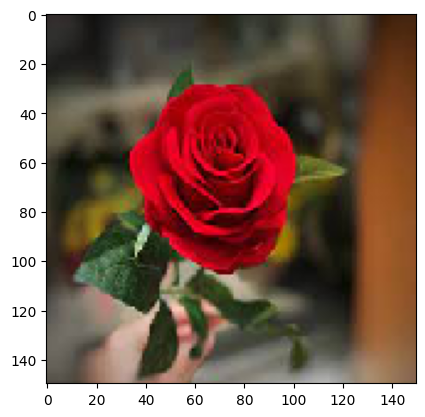

In [19]:
folder="/content/6.jpg"

img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['daisy','iris','rose','tulip','waterlily']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 48ms/step
tulip


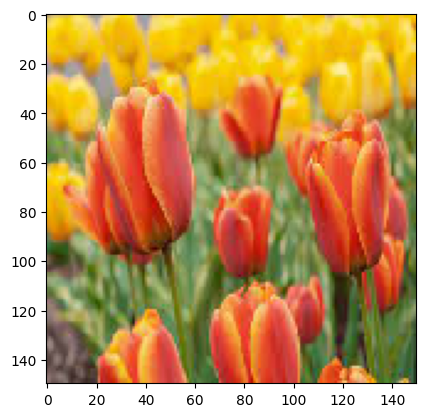

In [14]:
folder="/content/1.jpg"

img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['daisy','iris','rose','tulip','waterlily']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 255ms/step
iris


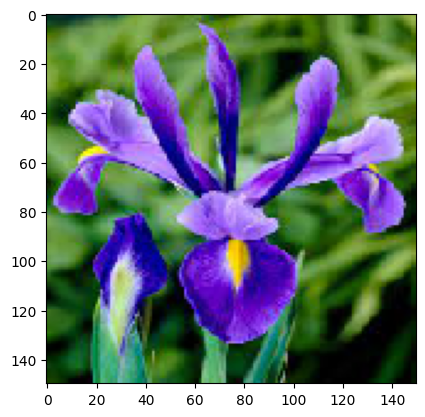

In [15]:
folder="/content/3.jpg"

img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['daisy','iris','rose','tulip','waterlily']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 44ms/step
daisy


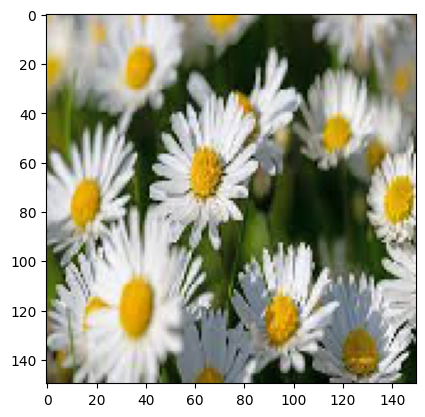

In [17]:
folder="/content/5.jpg"

img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['daisy','iris','rose','tulip','waterlily']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 44ms/step
waterlily


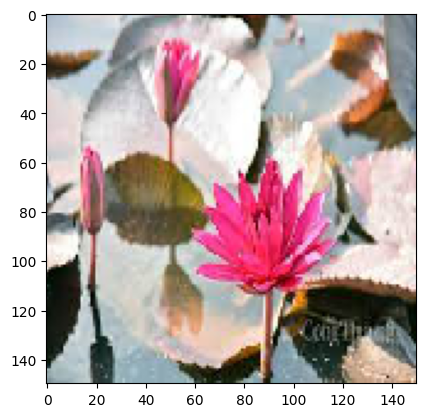

In [20]:
folder="/content/8.jpg"

img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['daisy','iris','rose','tulip','waterlily']
print(class_name[result])
plt.show()

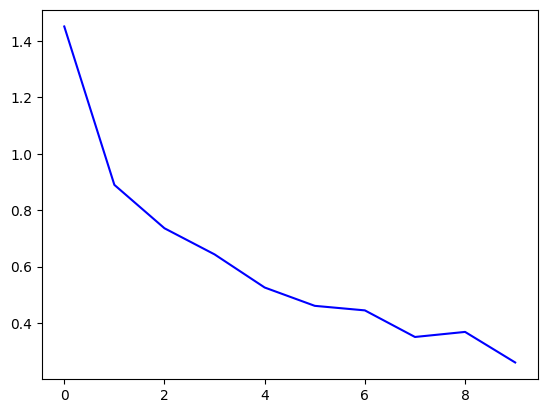

In [18]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()